In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
f = np.load(r"C:\Users\Timothy\Desktop\数学建模相关\二轮\数据集\acT1_cplx_stft_f.npy")
t = np.load(r"C:\Users\Timothy\Desktop\数学建模相关\二轮\数据集\acT1_cplx_stft_t.npy")
Zxx = np.load(r"C:\Users\Timothy\Desktop\数学建模相关\二轮\数据集\acT1_cplx_stft_Zxx.npy")
print(f.shape, t.shape, Zxx.shape)
Zxx100p_max_f = np.argmax(np.abs(Zxx[100:, :, :]), axis=1)
print(Zxx100p_max_f.shape)

(256,) (1025,) (950, 256, 1025)
(850, 1025)


In [3]:
RI = np.array([sum(f[Zxx100p_max_f[i]]) for i in range(Zxx100p_max_f.shape[0])])
FV = np.array([sum(np.diff(f[Zxx100p_max_f[i]])) for i in range(Zxx100p_max_f.shape[0])])
# FV_std = np.array([np.std(np.diff(f[Zxx100p_max_f[i]])) for i in range(Zxx100p_max_f.shape[0])])
print(min(abs(RI)))
print(min(abs(FV)))
# print(min(abs(FV_std)))

0.046875
0.0


In [47]:
from sklearn.svm import OneClassSVM
X0 = np.column_stack((RI[0:650], FV[0:650]))
X = np.column_stack((np.concatenate((RI[:320], RI[360:500], RI[576:650])), 
                     np.concatenate((FV[:320], FV[360:500], FV[576:650]))
                     ))# 选择合适的训练集
# X = np.column_stack(Zxx100p_max_f[:250, :])# 选取合适的训练集
# 创建 OneClassSVM 模型
model = OneClassSVM(kernel='rbf', nu=0.038, gamma='scale')
# 训练模型
model.fit(X)

# 使用训练好的模型来预测新的样本
y_pred = model.predict(X0)
print(y_pred[345], y_pred[516])
print(sum(y_pred))
ys = []
for i, y in enumerate(y_pred):
    if y == -1:
        ys.append(i)
print(ys)
targets = 20

print(targets/((650-sum(y_pred))/2))

-1 -1
560
[168, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 383, 384, 391, 421, 425, 482, 499, 500, 503, 505, 507, 514, 515, 516, 517, 518, 519, 520, 546, 589, 598, 600, 601, 602, 603, 607, 611, 625, 629, 630, 645]
0.4444444444444444


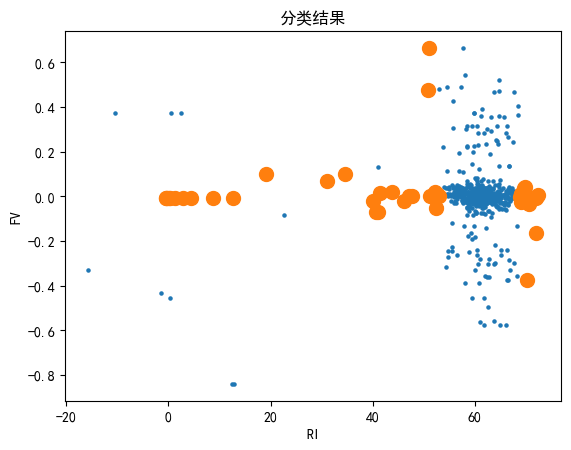

In [69]:
mask = np.ones(RI.shape, dtype=bool)
mask[ys] = False

# 使用遮罩选择要绘制的点
masked_RI = RI[mask]
masked_FV = FV[mask]

# 在散点图中绘制这些点
plt.scatter(masked_RI[:650], masked_FV[:650], s=5)

# 在散点图中绘制选出的点，使用不同的颜色和大小
plt.scatter(RI[ys], FV[ys], s=100)
plt.title("分类结果")
plt.xlabel('RI')
plt.ylabel('FV')
plt.show()